## MODULOS

In [78]:
# Gráficas interactivas en python
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [80]:
pip install tabulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid') #alternative
plt.rcParams['figure.dpi'] = 300
import plotly.express as px
#from IPython.display import HTML
from matplotlib import pyplot
#pyplot.rcParams['figure.dpi'] = 100
from statsmodels.graphics.tsaplots import plot_pacf
# Modulo para visualización de datos estadísticos
import seaborn as sns
# Modulo para utilizar herramientas estadísticas: distribuciones, estadísticas descriptivas, test estadísticos, etc.
import scipy.stats as scs
# Similar a scipy.stats
import statsmodels.api as sm
from scipy.stats import norm
import yfinance as yf
from tabulate import tabulate
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [82]:
# Función para calcular los estadisticos descriptivos:

def calc_stats(b1):
  ''' Calcula estadísticos de interés.

  Parámetros
  ==============
  b1: base datos
  '''
  desc1 = scs.describe(b1)
  print('%14s %14s' % ('Estadísticos', 'Valores'))
  print(30 * "-")
  print('%14s %14.3f' % ('tamano', desc1[0]))
  print('%14s %14.3f' % ('min', desc1[1][0]))
  print('%14s %14.3f' % ('max', desc1[1][1]))
  print('%14s %14.3f' % ('media', desc1[2]))
  print('%14s %14.3f' % ('desv', np.sqrt(desc1[3])))
  print('%14s %14.3f' % ('sesg', desc1[4]))
  print('%14s %14.3f' % ('kurt', desc1[5]+3))

## BASE DE DATOS

In [83]:
# Descargar precios del S&P 500 de Yahoo Finance
df_msft = yf.download('MSFT', start='2021-05-31', end='2022-05-31', progress=False)

In [84]:
df_msft.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [85]:
msft = df_msft.loc[:, ['Adj Close']]
msft.rename(columns={'Adj Close': 'adj_close'}, inplace=True)
msft

,adj_close
Date,
2021-06-01,245.396194
2021-06-02,245.297028
2021-06-03,243.719910
2021-06-04,248.758743
2021-06-07,251.754288
...,...
2022-05-23,260.649994
2022-05-24,259.619995
2022-05-25,262.519989


In [86]:
msft['simple_rtn'] = msft.adj_close.pct_change()
msft

,adj_close,simple_rtn
Date,,
2021-06-01,245.396194,NaN
2021-06-02,245.297028,-0.000404
2021-06-03,243.719910,-0.006429
2021-06-04,248.758743,0.020675
2021-06-07,251.754288,0.012042
...,...,...
2022-05-23,260.649994,0.032032
2022-05-24,259.619995,-0.003952
2022-05-25,262.519989,0.011170


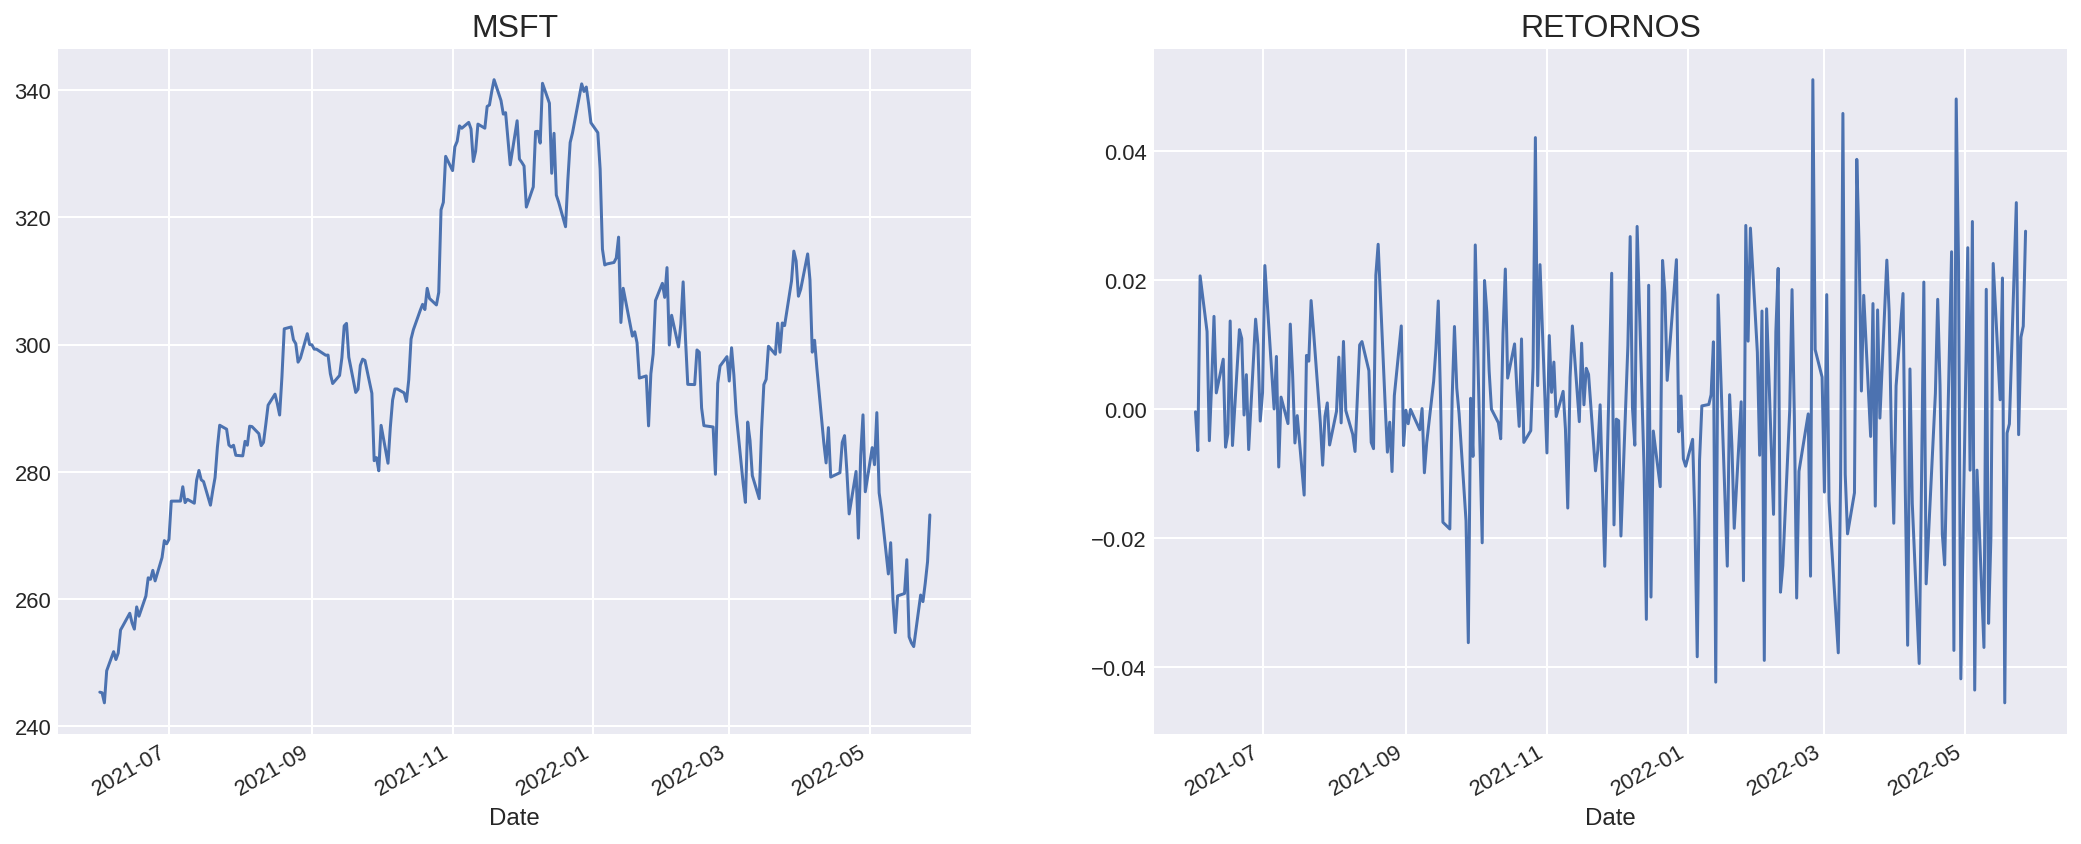

In [87]:
# Gráfica
fig, ax = plt.subplots(1,2, figsize=(18,7))
ax[0].set_title('MSFT', fontsize=16)
msft.adj_close.plot(ax=ax[0])
ax[1].set_title('RETORNOS', fontsize=16)
msft.simple_rtn.plot(ax=ax[1])
ax[0].grid(True)
ax[1].grid(True)

In [88]:
calc_stats(msft.adj_close)

  Estadísticos        Valores
------------------------------
        tamano        252.000
           min        243.720
           max        341.606
         media        295.453
          desv         23.590
          sesg          0.100
          kurt          2.435


In [89]:
calc_stats(msft.simple_rtn.iloc[1:])

  Estadísticos        Valores
------------------------------
        tamano        251.000
           min         -0.046
           max          0.051
         media          0.001
          desv          0.017
          sesg         -0.211
          kurt          3.529


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histograma precios')

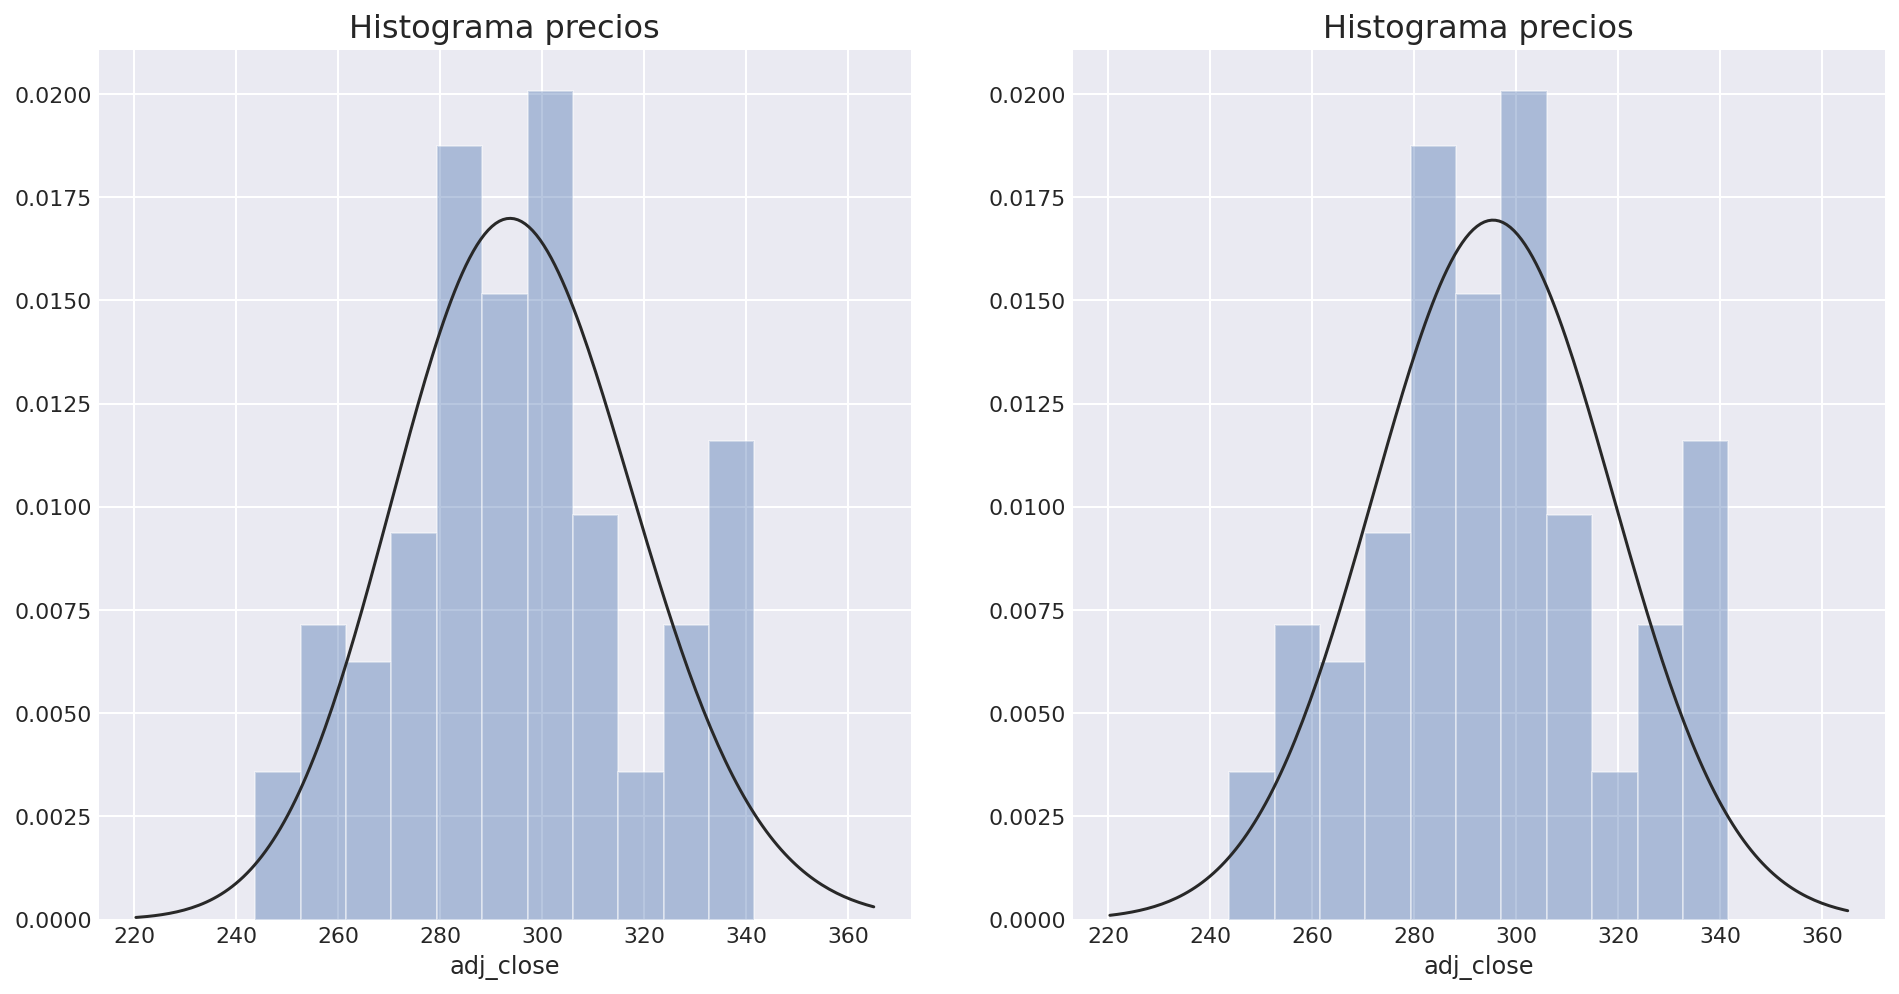

In [90]:
#from numpy.random.mtrand import lognormal
# Histograma datos

fig, ax = plt.subplots(1,2, figsize=(16,8))
sns.set() 

# Histograma
sns.distplot(msft.adj_close,  kde=False, fit=scs.lognorm, ax=ax[0])
sns.distplot(msft.adj_close,  kde=False, ax=ax[1], fit=norm)

ax[0].set_title('Histograma precios', fontsize=16)
ax[1].set_title('Histograma precios', fontsize=16)

# Guardar la imagen
# plt.savefig('norm_dist.png')
# plt.savefig('norm_dist.pdf')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'QQ-Plot')

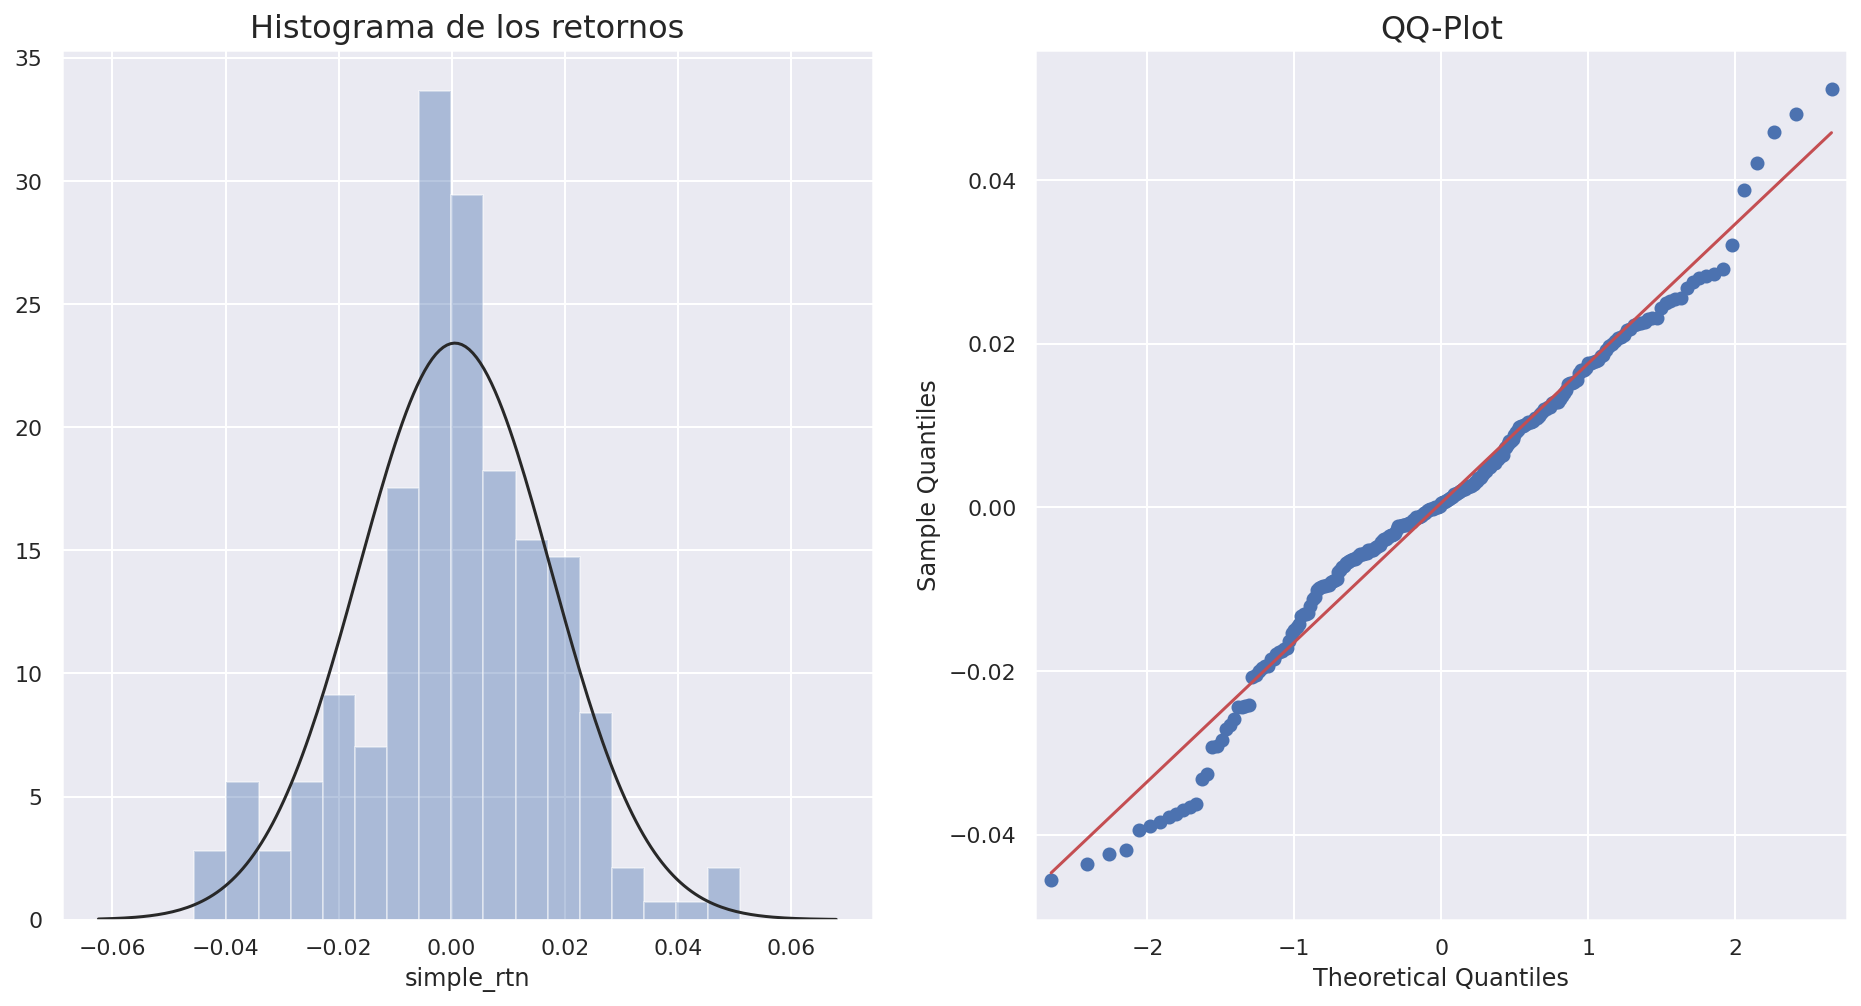

In [91]:
# Histograma de los retornos instantaneos

fig, ax = plt.subplots(1,2, figsize=(16,8))
sns.set() 

# Histograma
sns.distplot(msft.simple_rtn.iloc[1:],  kde=False, ax=ax[0], fit=norm)
ax[0].set_title('Histograma de los retornos', fontsize=16)

# QQ-Plot
qq = sm.qqplot(msft.simple_rtn.iloc[1:], line='s', ax=ax[1])
ax[1].set_title('QQ-Plot', fontsize=16)

# Guardar la imagen
# plt.savefig('norm_dist.png')
# plt.savefig('norm_dist.pdf')

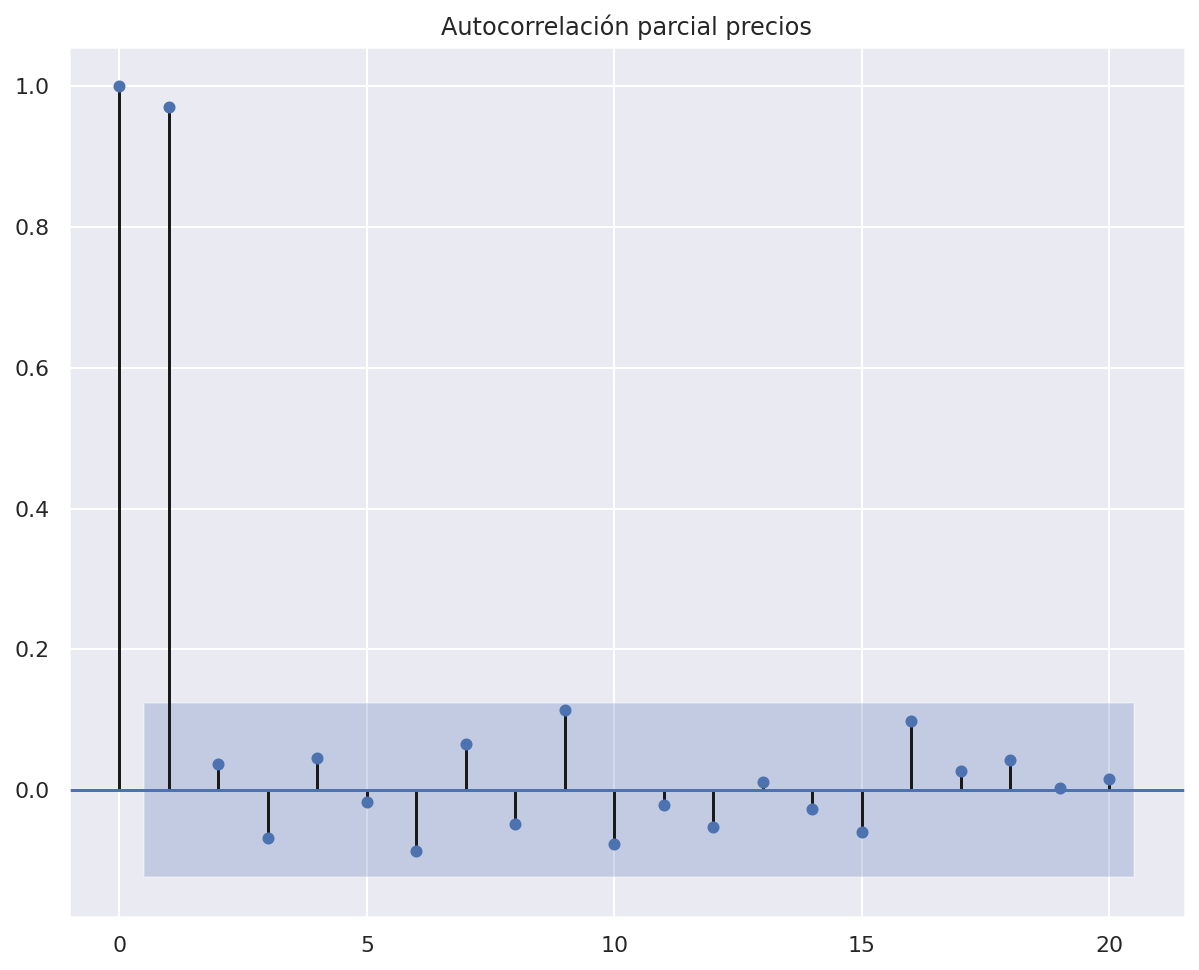

In [92]:
# Autocorrelación parcial datos
# Debe ser un proceso autorregresivo de orden 1
plt.rc("figure", figsize=(10,8))
plot_pacf(msft.adj_close, lags=20, title='Autocorrelación parcial precios')
pyplot.show()

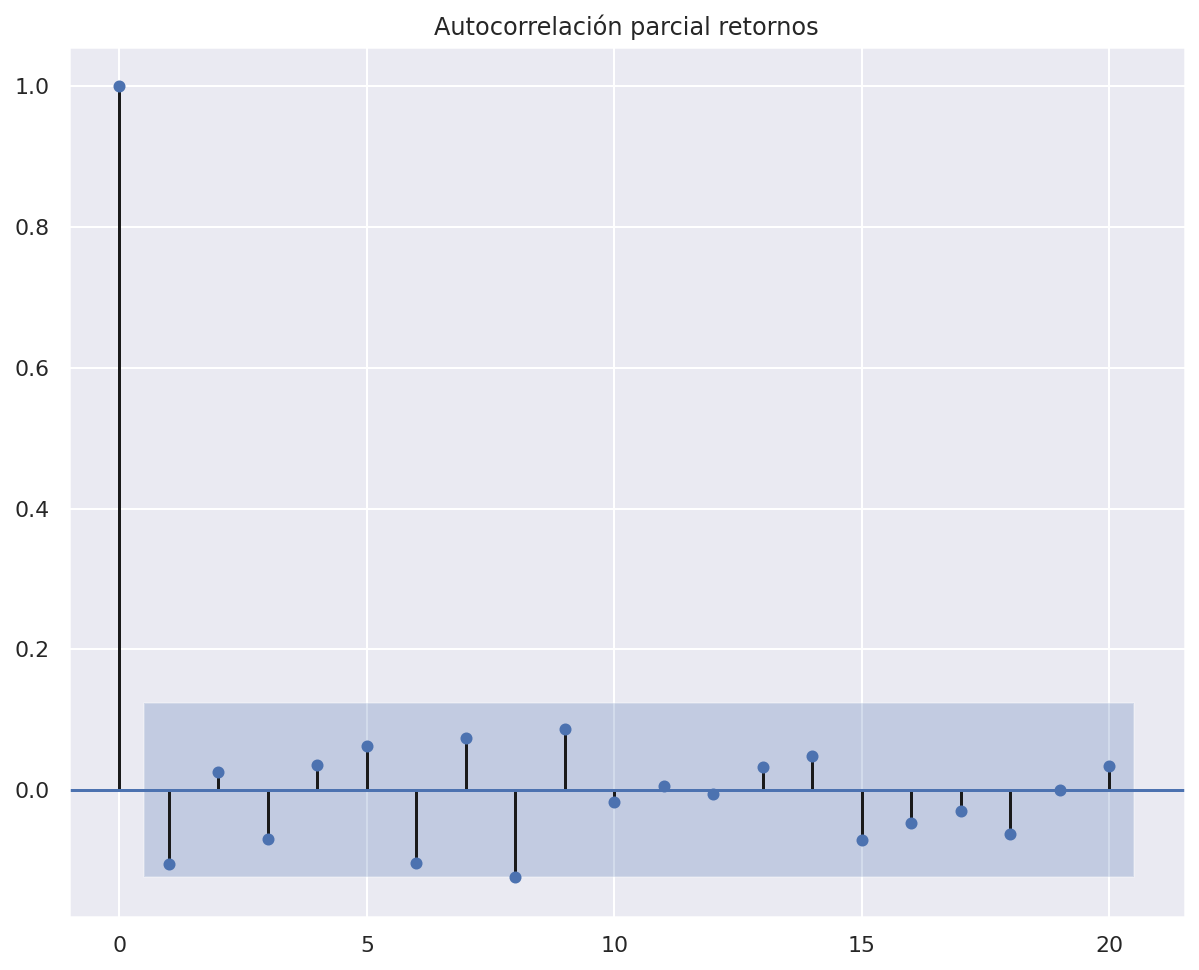

In [93]:
# Autocorrelación parcial retornos
# Debe ser un proceso completamente aleatorio
plt.rc("figure", figsize=(10,8))
plot_pacf(msft.simple_rtn.iloc[1:], lags=20, title='Autocorrelación parcial retornos')
pyplot.show()

## TEST DE NORMALIDAD

In [94]:
# Jarque-Bera
# Ideal tener mas de 2000 datos muestrales

# The Jarque-Bera test, tests whether the sample data has the skewness and kurtosis matching a normal distribution.
# H0: La distribución de los datos es normal

stat, p = scs.jarque_bera(msft.simple_rtn.iloc[1:])
#stat, p = scs.jarque_bera(msft.adj_close)
print('stat=%.3f, p=%.3f\n' % (stat, p))
if p > 0.05:
  print('Probably Gaussian')
else:
  print('Probably not Gaussian')

stat=4.798, p=0.091

Probably Gaussian


In [95]:
# Kolmogorov-Smirnov

# Se debe estandarizar la variable aleatoria
# Compara qué tanto la distribución acumulada se desvía de la distribución acumulada de la normal (estándar !).
# H0: La distribución de los datos es normal

stat, p = scs.kstest((msft.simple_rtn.iloc[1:]-msft.simple_rtn.iloc[1:].mean())/msft.simple_rtn.iloc[1:].std(), 'norm')
#stat, p = scs.kstest((msft.adj_close-msft.adj_close.mean())/msft.adj_close.std(), 'norm')
print('stat=%.3f, p=%.3f\n' % (stat, p))
if p > 0.05:
  print('Probably Gaussian')
else:
  print('Probably not Gaussian')

stat=0.078, p=0.088

Probably Gaussian


In [96]:
# Anderson-Darling

# Compara qué tanto la distribución acumulada de los datos se desvía de la distribución acumulada de la normal.

# H0: La distribución de los datos es normal
# If the returned statistic is larger than these critical values then
# for the corresponding significance level, the null hypothesis that
# the data come from the chosen distribution can be rejected.

result = scs.anderson(msft.simple_rtn.iloc[1:])
print('stat=%.3f' % (result.statistic))
for i in range (len(result.critical_values)):
  sig_lev, crit_val = result.significance_level[i], result.critical_values[i]
  if result.statistic < crit_val:
    print(f'Probably Gaussian: {crit_val} critical value at {sig_lev} level of significance')
  else:
    print(f'Probably not Gaussian: {crit_val} critical value at {sig_lev} level of significance')

stat=1.504
Probably not Gaussian: 0.567 critical value at 15.0 level of significance
Probably not Gaussian: 0.646 critical value at 10.0 level of significance
Probably not Gaussian: 0.775 critical value at 5.0 level of significance
Probably not Gaussian: 0.904 critical value at 2.5 level of significance
Probably not Gaussian: 1.075 critical value at 1.0 level of significance


In [97]:
# Shapiro-Wilk
# Tests whether a random sample comes from (specifically) a normal distribution. 

stat, p = scs.shapiro(msft.simple_rtn.iloc[1:])
print('stat=%.3f, p=%.3f\n' % (stat, p))
if p > 0.05:
  print('Probably Gaussian')
else:
  print('Probably not Gaussian')

stat=0.982, p=0.003

Probably not Gaussian


### Terminar análisis de identificación y validación ...

## PARAMETROS

In [98]:
# Horizonte de tiempo (hasta donde vamos a proyectar los posibles escenarios, siempre T en años)
T = 3/12  # tres meses  
# Tamaño del incremento
# dt = T/N
# Frecuencia de los datos
dt = 1/252 # diarios
# Número de subintervalos (días proyectados)
N = int(T/dt)
# Replicabilidad de resultados
# np.random.seed(100)
# Número de simulaciones
n_sims = 10000
# Intervalo de tiempo proyección
tims = np.linspace(0, N, N+1)
tim = tims*dt
tim_steps = np.broadcast_to(tim, (n_sims, N+1))
# Rendimientos instantáneos promedio anualizados (si trabajamos con datos anualizados 1/252)
# Rendimiento promedio anualizado
# Usamos la tasa libre de riesgo para valorar
# https://www.federalreserve.gov/releases/h15/
mu = 0.0006
# Volatilidad promedio anualizada
sigma = msft.simple_rtn.std()/np.sqrt(dt)
# Condición inicial del proceso
mbg_0 = msft.adj_close[251] # último precio que cotiza la serie de tiempo
# Precio de ejercicio de la opción
K=300

## Simulación Escenarios

In [99]:
# MBE

dB = np.random.normal(scale= np.sqrt(dt), size=(n_sims, N))
B = np.cumsum(dB, axis=1)
mbe = np.insert(B, 0, 0.0, axis=1)

# Sln Exacta Discretizada

mbg_se = mbg_0*np.exp((mu-0.5*sigma**2)*tim_steps + sigma*mbe)

# Sln Numerica Euler-Maruyama

mbg_sn1 = mbg_0*np.cumprod(1+mu*dt+sigma*dB, axis=1)
mbg_sn = np.insert(mbg_sn1, 0, mbg_0, axis=1)


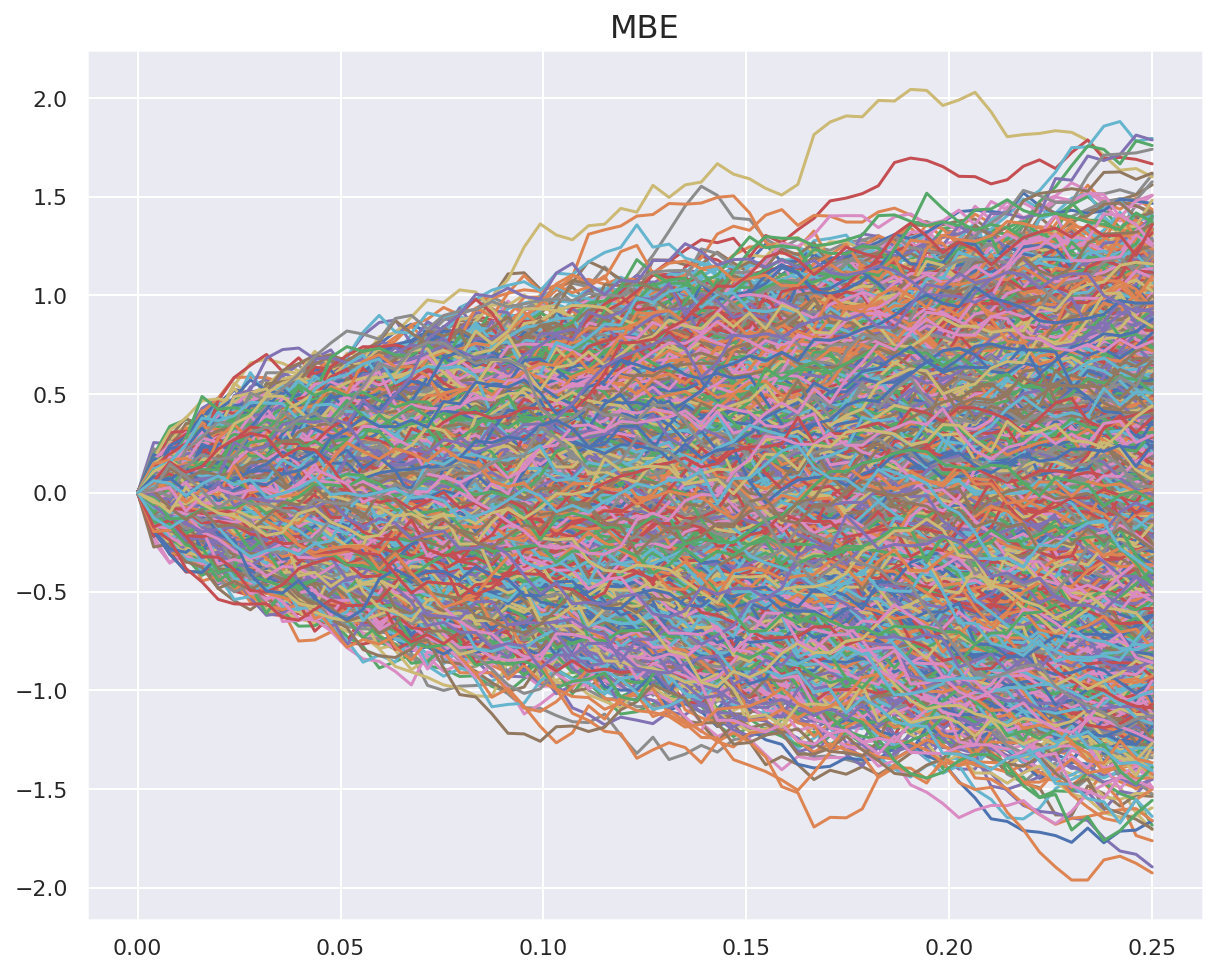

In [100]:
# Gráfica MBE
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.set_title('MBE', fontsize=16)
ax.plot(tim, np.transpose(mbe))
ax.grid(True)

In [101]:
# t_aux
t_aux1 = np.linspace(-msft['adj_close'].size, 0, msft['adj_close'].size)
t_aux = t_aux1*dt*0.25
t_aux.size

252

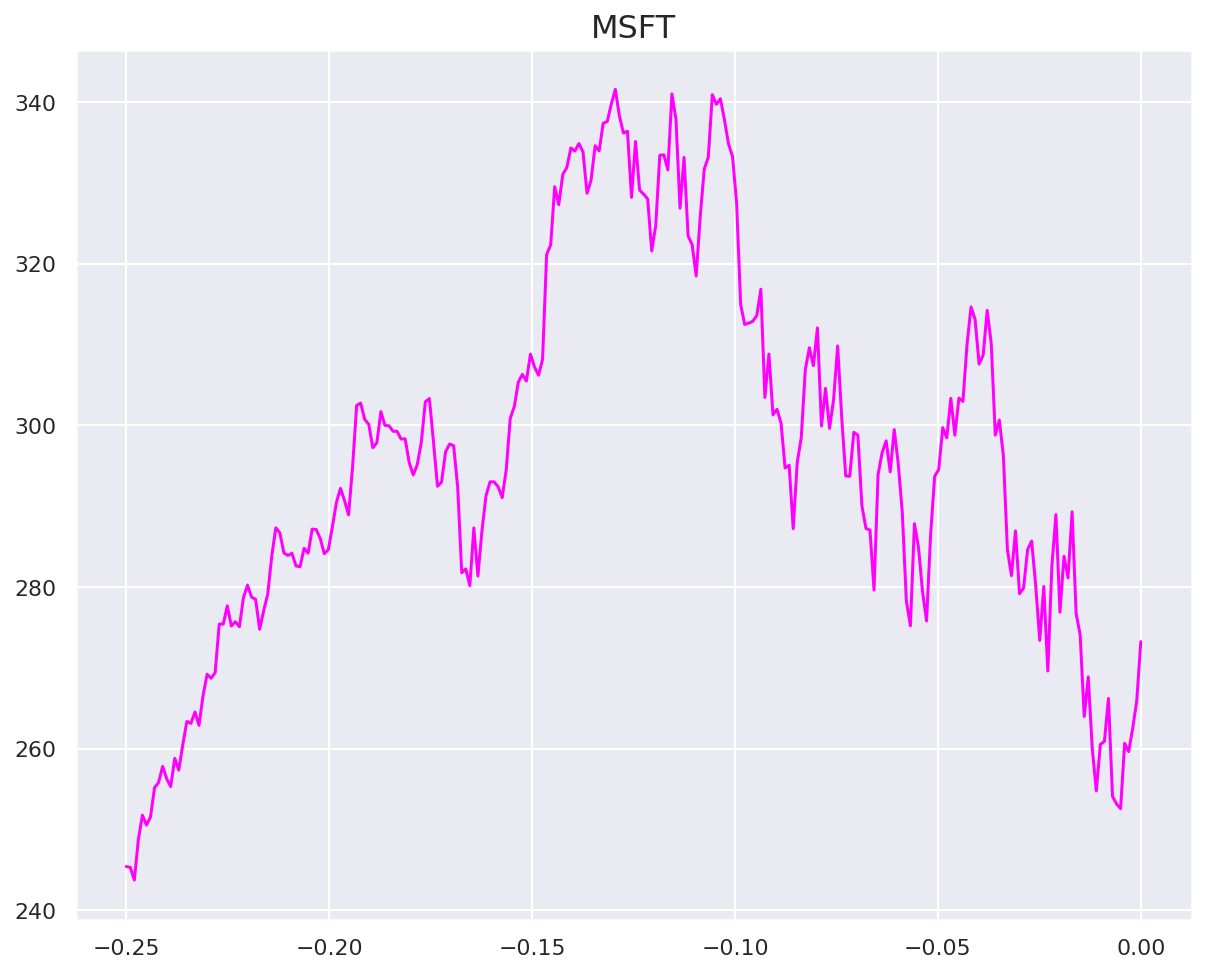

In [102]:
# Gráfica aux
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.set_title('MSFT', fontsize=16)
ax.plot(t_aux, msft['adj_close'],'magenta')
ax.grid(True)

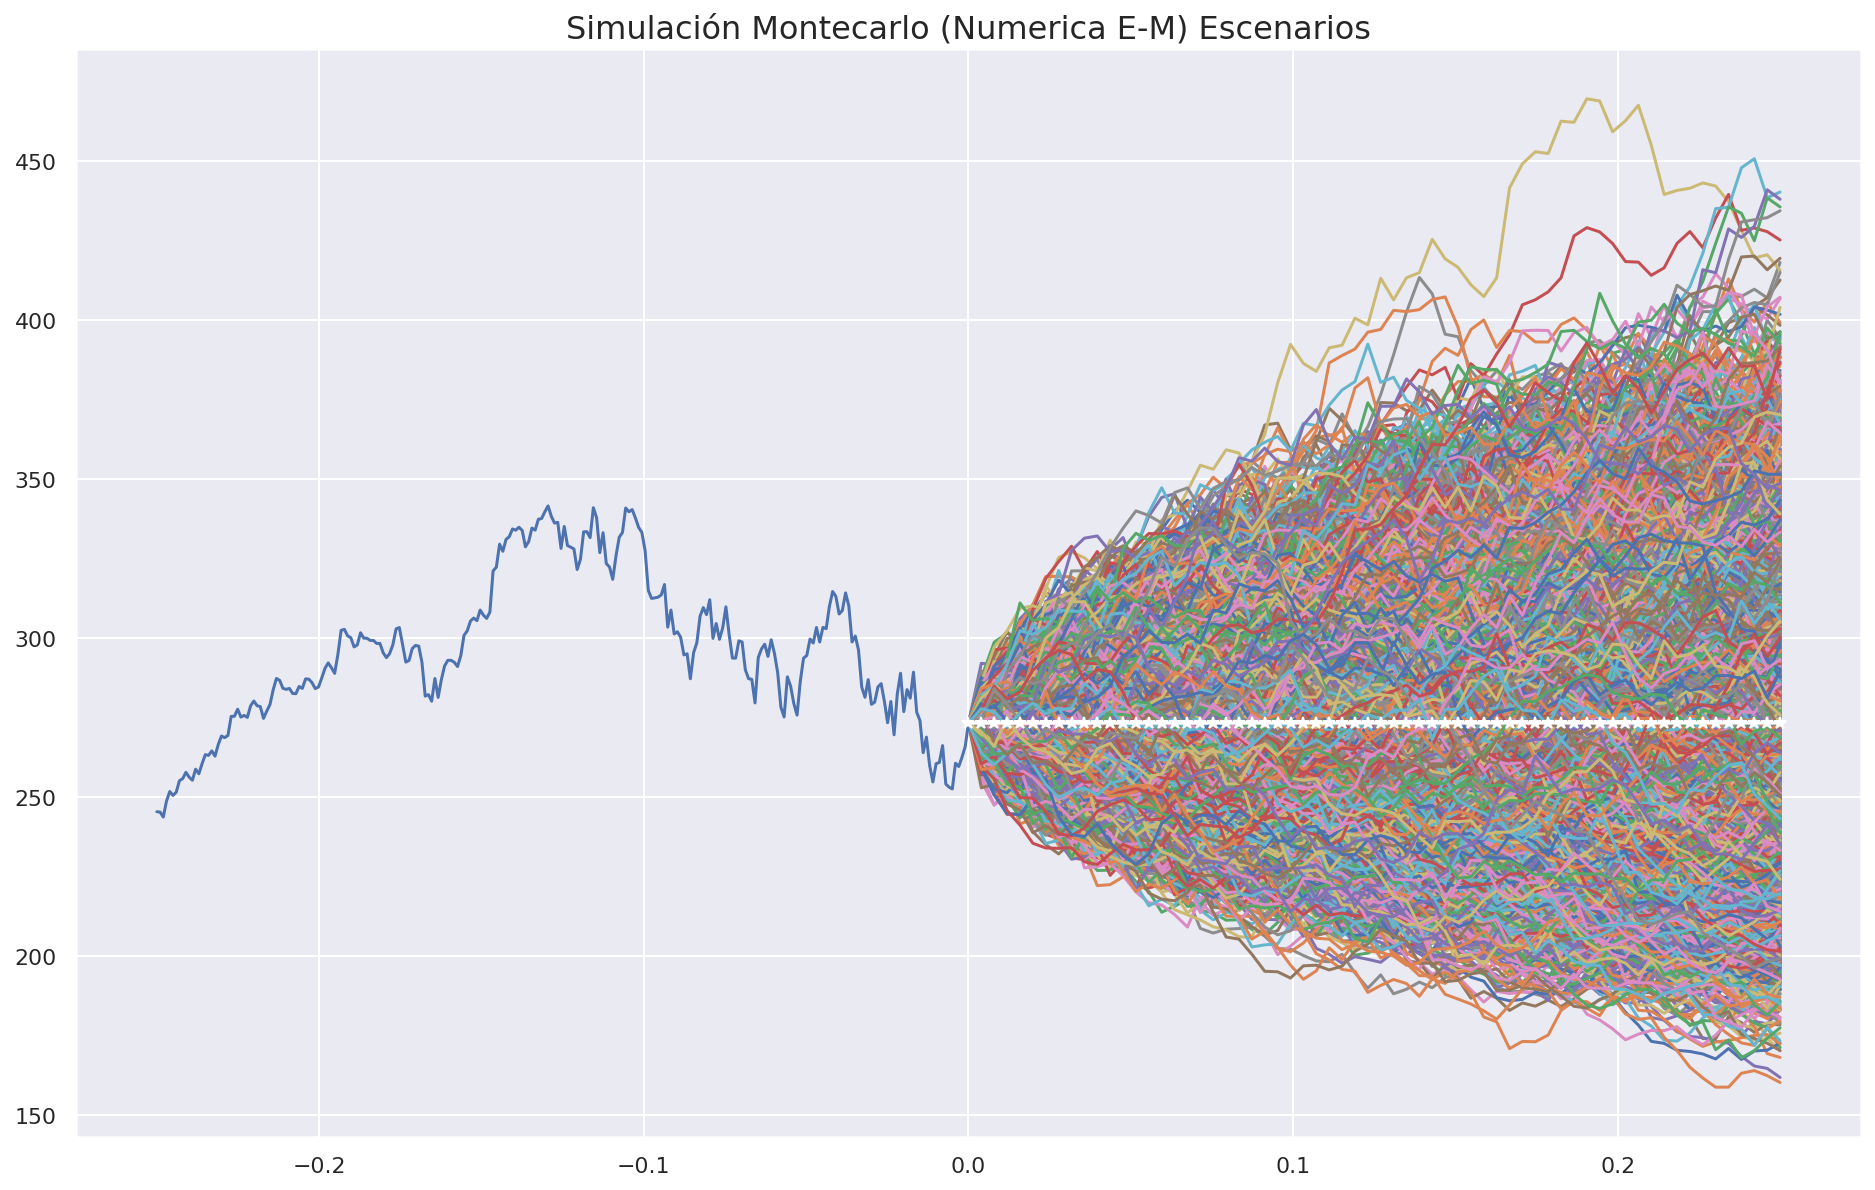

In [103]:
# Gráfica
fig, ax = plt.subplots(1,1, figsize=(16, 10))
# ax[0].set_title('Solucion Exacta discretizada', fontsize=16)
ax.set_title('Simulación Montecarlo (Numerica E-M) Escenarios', fontsize=16)
# ax[0].plot(tim, np.transpose(mbg_se))
# ax[0].plot(t_aux, msft['adj_close'])
ax.plot(tim, np.transpose(mbg_sn))
ax.plot(t_aux, msft['adj_close'])
# Línea de tendencia
# ax[0].plot(tim, mbg_0*np.exp(mu*tim), 'white', marker='*')
ax.plot(tim, mbg_0*np.exp(mu*tim), 'white', marker='*')
# ax[0].grid(True)
ax.grid(True)

In [104]:
# ST es la variable aleatoria de los precios spot en el tiempo T (3 meses adelante)
ST = mbg_sn[:,N]
ST

array([303.3044222 , 275.97494131, 269.9449657 , ..., 199.25755879,
       305.3595692 , 243.2159963 ])

In [105]:
# La media de ST debe ser aprox. igual a E[ST]=S_0*exp(r*T)
print(ST.mean())
print(mbg_0*np.exp(mu*T))

273.6550441402823
273.28097930701375


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histograma distribución (norm) de precios en T')

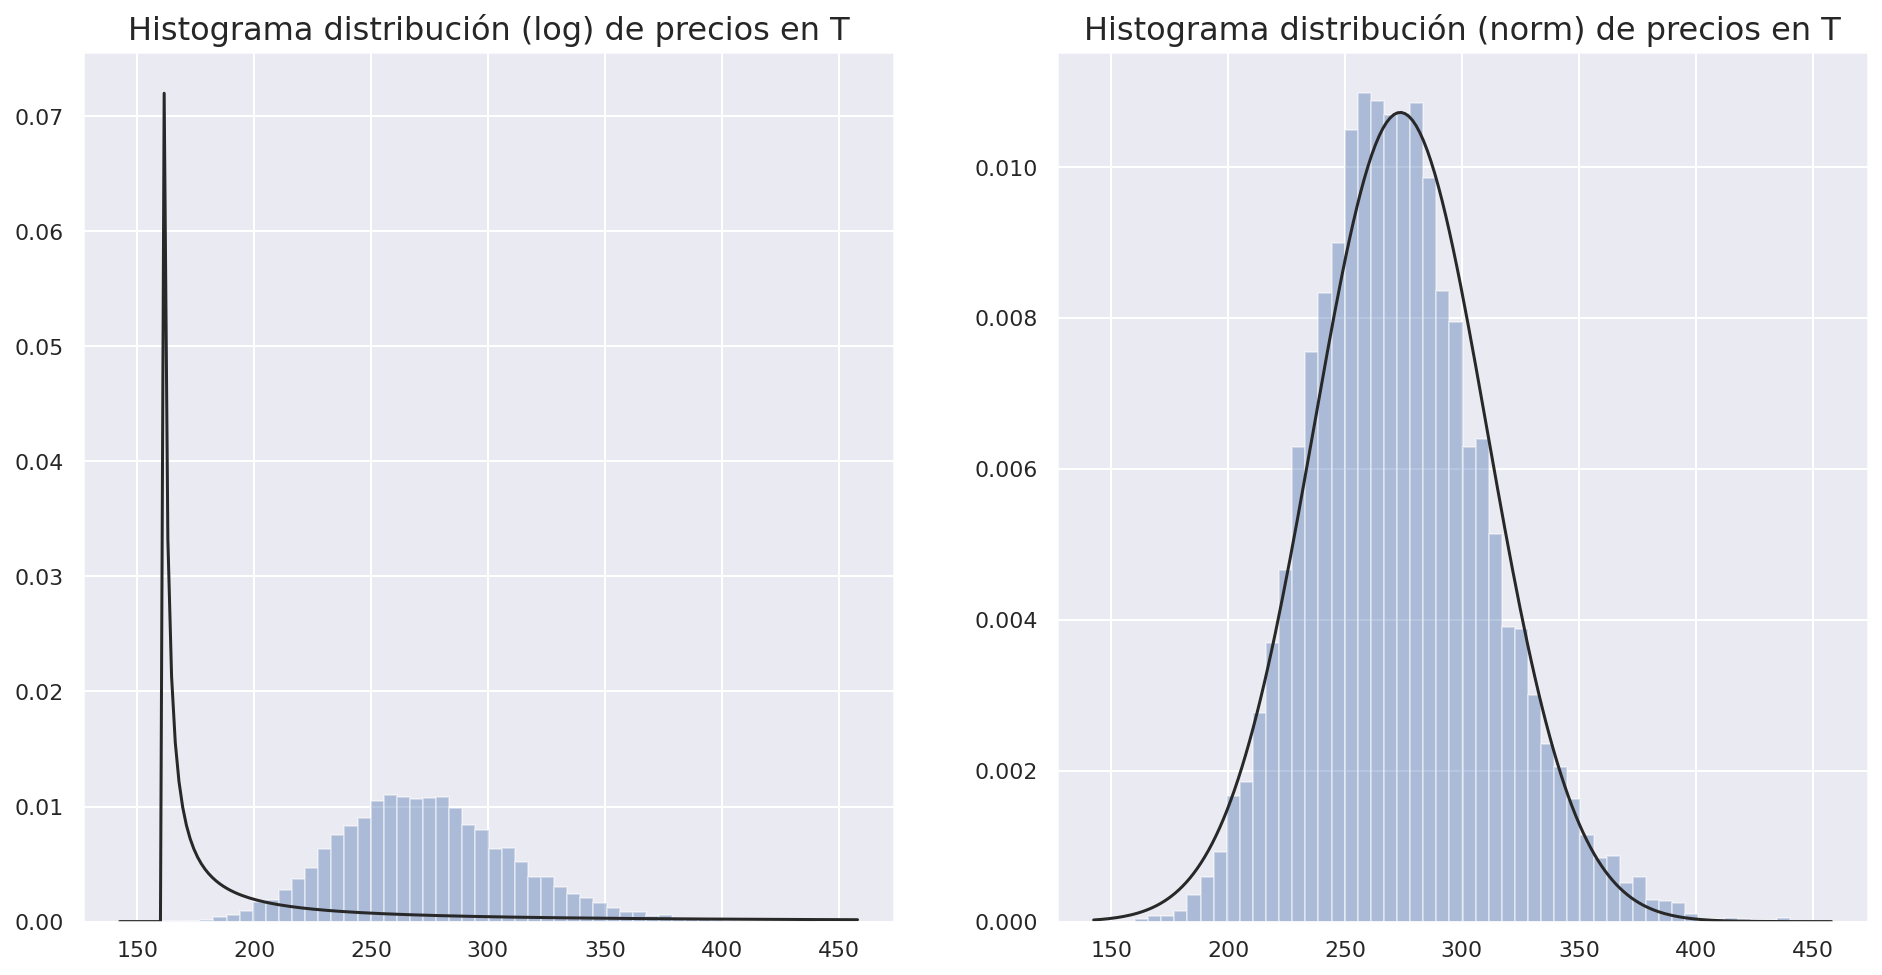

In [106]:
# Debemos verificar que ST distribuye lognormal

#from numpy.random.mtrand import lognormal
# Histograma datos

fig, ax = plt.subplots(1,2, figsize=(16,8))
sns.set() 

# Histograma
sns.distplot(ST,  kde=False, fit=scs.lognorm, ax=ax[0])
sns.distplot(ST,  kde=False, ax=ax[1], fit=norm)

ax[0].set_title('Histograma distribución (log) de precios en T', fontsize=16)
ax[1].set_title('Histograma distribución (norm) de precios en T', fontsize=16)

# Guardar la imagen
# plt.savefig('norm_dist.png')
# plt.savefig('norm_dist.pdf')

In [107]:
# Podríamos calcular la probabilidad de que el precio esté por debajo de K (precio de ejercicio K)
# En el caso de una opción call estáriamos out of the money

ST[ST<300]

array([275.97494131, 269.9449657 , 272.10129494, ..., 293.35208277,
       199.25755879, 243.2159963 ])

In [108]:
prob_perd = (ST[ST<300].size/ST.size)*100
prob_perd

77.5

In [109]:
prob_ut = (ST[ST>300].size/ST.size)*100
prob_ut

22.5

## PAYOFFS --> INGRESOS O EJERCICIO DE LA OPCIÓN

In [110]:
payoff_c = np.zeros(N)
payoff_p = np.zeros(N)


for k in range(N):
  payoff_c[k] = max(ST[k]-300.00, 0)
  payoff_p[k] = max(300.00-ST[k], 0)


print(payoff_c)
print(payoff_p)
print(payoff_c.size)
print(payoff_p.size)

[ 3.3044222   0.          0.          0.         53.11861637  0.
 12.72312845  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          4.77442076  0.         40.96682886  0.
  6.95621049  0.         45.10195049  0.          0.          2.07529984
  0.          0.          0.          0.         10.31473345  0.
  0.          0.          0.          0.          0.          0.
 34.60626571 38.48860062  0.         48.67912147 16.49899195  0.
 18.75917582  0.          0.        ]
[ 0.         24.02505869 30.0550343  27.89870506  0.         27.30967687
  0.         49.9792281  40.05458468 26.93685992 47.18918993 13.36138027
 64.39875522 80.30361594 46.8128177  29.15618168 56.36437451 25.04577139
  7.57412241 73.24627924 52.00633026 39.2325963  19.14351764  3.81649126
 64.45527398

## VALORACIÓN

In [111]:
# ESPERADO DEL PAYOFF TRAIDO A VALOR PRESENTE

mean_payoffc = payoff_c.mean()
mean_payoffp = payoff_p.mean()

call = np.exp(-mu*T)*mean_payoffc
put = np.exp(-mu*T)*mean_payoffp

print(call)
print(put)

5.338370080996192
33.612946136943904


## FORMULA DE BLACK-SCHOLES

 https://medium.com/swlh/calculating-option-premiums-using-the-black-scholes-model-in-python-e9ed227afbee

In [112]:
# d1 y d2

def d1(S,K,T,r,sigma):
  return(np.log(S/K)+(r+sigma**2/2.)*T)/(sigma*np.sqrt(T))
def d2(S,K,T,r,sigma):
  return d1(S,K,T,r,sigma)-sigma*np.sqrt(T)

In [113]:
# FORMULA BLACK-SCHOLES

def bs_call(S,K,T,r,sigma):
  return S*scs.norm.cdf(d1(S,K,T,r,sigma))-K*np.exp(-r*T)*scs.norm.cdf(d2(S,K,T,r,sigma))
  
def bs_put(S,K,T,r,sigma):
  return K*np.exp(-r*T)-S+bs_call(S,K,T,r,sigma)

In [114]:
# VALORACIÓN

call_bs = bs_call(mbg_0, 300.00, T, mu, sigma)
put_bs = bs_put(mbg_0, 300.00, T, mu, sigma)
print(call_bs)
print(put_bs)

5.644275986793048
32.359289127249326


In [115]:
# RESULTADOS

table = [['Método', 'Prima CALL', 'Prima PUT'], ['BS', call_bs, put_bs], ['MC', call, put]]
print(tabulate(table))

------  -----------------  ------------------
Método  Prima CALL         Prima PUT
BS      5.644275986793048  32.359289127249326
MC      5.338370080996192  33.612946136943904
------  -----------------  ------------------


In [116]:
sigma

0.27099085067842205